<img align="right" src="images/data_types.png" width="480px">

## Categorical Data Encoding Guide

**TLDR: 25x Memory Reduction and Faster Performance on Pandas Dataframe**

This guide steps us through the process of understanding and leveraging categorical data features. We'll give step by step instructions and examples on converting data features using the Pandas **category** type. In a follow on notebook will show how to properly use categorical data with machine learning models [Categorical Data, ML, and Dangers!](https://nbviewer.jupyter.org/github/SuperCowPowers/scp-labs/blob/master/notebooks/Categorical_Encoding_Dangers.ipynb).

As we can see by the diagram on the right, categorical features include things like:

    Music Genre = 'jazz', 'rock', 'classical', ...
    DNS Records = 'A', 'AAAA', 'PTR', 'TXT', 'SVR', ...
  
We'll be discussing both the nominal and ordinal types of categorical features. These features can be important discriminators when classifying and organizing data. Converting features into categorical types gives important benefits, in both memory and performance. Toward the end of this notebook will leverage our small/fast categorical data fields to show off some nice functionality with a quick **(and eye opening!)** analysis of data from the [Stanford Open Policing Project](https://openpolicing.stanford.edu/).

In the follow up notebook we'll be discussing how to convert categorical features in preparation for machine learning libraries like Scikit-Learn or PyTorch [Categorical Data, ML, and Dangers!](https://nbviewer.jupyter.org/github/SuperCowPowers/scp-labs/blob/master/notebooks/Categorical_Encoding_Dangers.ipynb)

<img align="right" src="images/stanford_po.png" width="250px">

## Data Used
- [Stanford Open Policing Project](https://openpolicing.stanford.edu/)
- [Connecticut Data](https://stacks.stanford.edu/file/druid:py883nd2578/CT-clean.csv.gz)

**NOTE:** We're simply using this data for demonstration purposes so we've pulled a subset
          of the data above and saved that into a file data/ci_police_data.csv

## Resources for Categorical Encoding
<img align="right" src="images/pandas.png" width="250px">

- [Pandas Categorical Docs](https://pandas.pydata.org/pandas-docs/stable/categorical.html)
- [Pandas Github Issue](https://github.com/pandas-dev/pandas/issues/8918)
- [Get Smarties](https://github.com/joeddav/get_smarties)
- [Tom Augspurger PyData Chicago 2016](https://youtu.be/KLPtEBokqQ0)
- [Categorical Handling for Python](https://www.datacamp.com/community/tutorials/categorical-data)

## General Resouces for Pandas
- [Python for Data Analysis (Great Book!)](http://shop.oreilly.com/product/0636920050896.do)
- [Data School on YouTube](https://www.youtube.com/channel/UCnVzApLJE2ljPZSeQylSEyg)

In [16]:
# Note: It's always a good idea to print out library versions
import pandas as pd
print(pd.__version__)

# Plotting defaults
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14.0
plt.rcParams['figure.figsize'] = 12.0, 5.0

0.23.4


<img align="left" src="images/stanford_po.png" width="250px">
<img align="right" src="images/police.jpg" width="200px">

### Open up our dataset
As mentioned above we're going to be using a subset of the **Stanford Open Policing Project** data. Specifically we're using the dataset from Connecticut and although we looked we didn't see any Storm Troopers arrests. :)

Note: Pandas conducts inference of the file type from the name and will automatically unzip files for you.

In [3]:
df = pd.read_csv('data/ci_police_data.csv.gz')

In [4]:
df.head()

,county_name,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome
0,Fairfield County,F,69.0,Black,Speeding,False,NaN,Ticket
1,Tolland County,M,20.0,White,Moving violation,False,NaN,Verbal Warning
2,New London County,M,34.0,Hispanic,Speeding,False,NaN,Ticket
3,Fairfield County,M,46.0,Black,Speeding,False,NaN,Written Warning
4,Hartford County,M,30.0,White,Speeding,False,NaN,Ticket


<img align="right" src="images/deep_dive.jpg" width="250px">

## Deeper Dive
Let's take a deeper dive and investigate our Dataframe types and memory usage. The columns below list the types for the contained data. Float, bool, and object, the object type is typically a string but can be a list, dictionary or other Python object.

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
county_name         5000 non-null object
driver_gender       5000 non-null object
driver_age          4998 non-null float64
driver_race         5000 non-null object
violation           5000 non-null object
search_conducted    5000 non-null bool
search_type         70 non-null object
stop_outcome        4921 non-null object
dtypes: bool(1), float64(1), object(6)
memory usage: 1.8 MB


In [6]:
# Let's look at the unique values for the columns that we might want 
# to change into a category type instead of leaving as string.
# We have 6 columns that we consider changing to categories
print('County Name: {!s}'.format(df['county_name'].unique()))
print('\nDriver Gender: {!s}'.format(df['driver_gender'].unique()))
print('\nDriver Race: {!s}'.format(df['driver_race'].unique()))
print('\nViolation: {!s}'.format(df['violation'].unique()))
print('\nSearch Type: {!s}'.format(df['search_type'].unique()))
print('\nStop Outcome: {!s}'.format(df['stop_outcome'].unique()))

County Name: ['Fairfield County' 'Tolland County' 'New London County' 'Hartford County'
 'Litchfield County' 'New Haven County' 'Middlesex County'
 'Windham County']

Driver Gender: ['F' 'M']

Driver Race: ['Black' 'White' 'Hispanic' 'Other']

Violation: ['Speeding' 'Moving violation' 'Lights' 'Other' 'Registration/plates'
 'Safe movement' 'License' 'Stop sign/light' 'Seat belt' 'Cell phone'
 'Equipment' 'License,Other' 'Other,Registration/plates' 'Other,Speeding'
 'Moving violation,Other' 'Registration/plates,Speeding' 'Other,Seat belt'
 'License,Lights' 'Lights,Speeding']

Search Type: [nan 'Consent' 'Other' 'Inventory']

Stop Outcome: ['Ticket' 'Verbal Warning' 'Written Warning' nan 'Summons' 'Arrest']


<img align="right" src="images/exploration.jpg" width="350px">

## Looking pretty good...
The biggest thing we're looking for is a reasonably small number of unique values. For instance 'driver_name', if we had that field, would be a horrible field to convert because we'd have a LOT of potential values.

Out of the 6 columns above they all look good except for maybe the 'Violation' column. Depending on what we want to do with our data analysis we may want to do some 'remapping' of our Violation type. For instance if we're looking for statistics on Speeding we don't really want 'Speeding', 'Other, Speeding,', 'Lights, Speeding', and 'blah, Speeding' to be treated differently. So here we do some remapping of the violation column values.

In [7]:
# Define our mappings for the Violoation column
def remap(x):
    m = {'License,Other': 'License', 
         'Other,Registration/plates': 'Registration/plates',
         'Other,Speeding': 'Speeding', 
         'Moving violation,Other': 'Moving violation',
         'Registration/plates,Speeding': 'Speeding', 
         'Other,Seat belt': 'Seat belt',
         'License,Lights': 'License',
         'Lights,Speeding': 'Speeding'}
    return m[x] if x in m else x

df['violation'] = df['violation'].map(remap)

# Now check our violation column again
print('Violation: {!s}'.format(df['violation'].unique()))

Violation: ['Speeding' 'Moving violation' 'Lights' 'Other' 'Registration/plates'
 'Safe movement' 'License' 'Stop sign/light' 'Seat belt' 'Cell phone'
 'Equipment']


<img align="left" src="images/convert.png" width="150px">

## Now convert the columns to Categorical types
Okay, now that we've looked deeply at our column values, done some mapping to reduce the number of potential values we're ready to convert the Pandas dataframe to categorical columns

In [8]:
columns_to_convert = ['county_name', 'driver_gender', 'driver_race', 
                      'violation', 'search_type', 'stop_outcome']
for column in columns_to_convert:
    df[column] = df[column].astype('category')
df.head()

,county_name,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome
0,Fairfield County,F,69.0,Black,Speeding,False,NaN,Ticket
1,Tolland County,M,20.0,White,Moving violation,False,NaN,Verbal Warning
2,New London County,M,34.0,Hispanic,Speeding,False,NaN,Ticket
3,Fairfield County,M,46.0,Black,Speeding,False,NaN,Written Warning
4,Hartford County,M,30.0,White,Speeding,False,NaN,Ticket


In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
county_name         5000 non-null category
driver_gender       5000 non-null category
driver_age          4998 non-null float64
driver_race         5000 non-null category
violation           5000 non-null category
search_conducted    5000 non-null bool
search_type         70 non-null category
stop_outcome        4921 non-null category
dtypes: bool(1), category(6), float64(1)
memory usage: 76.6 KB


<img align="right" src="images/fast.jpg" width="380px">

## Less Memory and Better Performance!
The dataframe looks the same (which is a good thing), but we can see above that the types of the columns have changed AND the memory use went from **1.8MB** to **77KB**. 

**A 25x Memory Decrease!** 

Not only will this conversion use less memory but dataframe operations will see a **significant performance improvement** since the values are now stored in a more efficient form.

## Let's take it for a ride
Now that we have our new compact and efficient dataframe, let's leverage some great built-in functionality:
- groupby
- filtering
- aggregation

In [10]:
# Groupby is great.Here's a break-down of violations with respect to sex in one line
df.groupby('driver_gender')['violation'].value_counts()

driver_gender  violation          
F              Speeding                569
               Other                   415
               Registration/plates     222
               Cell phone              178
               Moving violation        125
               Lights                   48
               Seat belt                35
               Stop sign/light          27
               Safe movement            22
               License                   8
               Equipment                 6
M              Speeding               1139
               Other                   978
               Registration/plates     344
               Moving violation        286
               Cell phone              208
               Lights                  130
               Seat belt               116
               Safe movement            58
               Stop sign/light          36
               Equipment                25
               License                  25
Name: violation, dt

In [11]:
# Groupby is great. Here's a break-down of searches conducted with respect to race
df.groupby('driver_race')['search_conducted'].value_counts()

driver_race  search_conducted
Black        False                590
             True                  22
Hispanic     False                501
             True                  13
Other        False                  1
White        False               3822
             True                  51
Name: search_conducted, dtype: int64

In [12]:
# Let compute percentages and filter just the True values
search_percent = df.groupby('driver_race')['search_conducted'].value_counts(normalize=True)[:, True]*100.0
search_percent

driver_race
Black       3.594771
Hispanic    2.529183
White       1.316809
Name: search_conducted, dtype: float64

In [13]:
# Here's a break-down of stop outcomes with respect to race (with compute percentages)
stop_outcome = df.groupby('driver_race')['stop_outcome'].value_counts(normalize=True)*100.0
stop_outcome

driver_race  stop_outcome   
Black        Ticket              71.217105
             Verbal Warning      11.677632
             Summons              7.565789
             Written Warning      6.414474
             Arrest               3.125000
Hispanic     Ticket              76.435644
             Verbal Warning       8.910891
             Summons              6.732673
             Written Warning      5.544554
             Arrest               2.376238
Other        Ticket             100.000000
White        Ticket              71.762543
             Verbal Warning      12.871027
             Written Warning     10.795902
             Summons              3.020751
             Arrest               1.549777
Name: stop_outcome, dtype: float64

<img align="right" src="images/data_types.png" width="480px">

## Let's Revisit our Categorical Data Types
So far we been treating our data as **Nominal** unordered categories, but looking at the data above we see that **stop_outcome** could be treated as an **Ordinal** type. We can order the outcomes by severity from least to most:

- Verbal Warning *(least severe)*
- Written Warning
- Ticket
- Summons 
- Arrest *(most severe)*

So, thankfully, Pandas has great support for ordinal types so let's make that change right now :)

In [105]:
# Change our 'stop_outcome' field to an Ordinal Type
from pandas.api.types import CategoricalDtype
cat_order = ['Verbal Warning', 'Written Warning', 'Ticket', 'Summons', 'Arrest']
df['stop_outcome'] = df['stop_outcome'].astype(CategoricalDtype(categories=cat_order, ordered=True))

# Print some info about our new, ordinal category type!
df.stop_outcome.head()

0             Ticket
1     Verbal Warning
2             Ticket
3    Written Warning
4             Ticket
Name: stop_outcome, dtype: category
Categories (5, object): [Verbal Warning < Written Warning < Ticket < Summons < Arrest]

<img align="left" src="images/stacking.jpg" width="180px">

## Ordinal Data Discussion
We can see from the output above that Pandas now has our 'stop_outcome' field stored as an ordinal categorical type. In fact we can see the < relationship shown above:

```
    [Verbal Warning < Written Warning < Ticket < Summons < Arrest]
```
Now that we have this 'order' in place we'll use this to separate out the rows in our data into 'less severe' and 'more severe' stop outcomes. Below you can see that in a line or two of code we're can easily leverage this new powerful capability.

In [32]:
less_severe = df[df['stop_outcome'] <= 'Ticket']  # Yes this works!
more_severe = df[df['stop_outcome'] > 'Ticket']
print('All rows: {:d}'.format(len(df)))
print('Less Severe: {:d}'.format(len(less_severe)))
print('\t {!r}'.format(list(less_severe['stop_outcome'].unique())))
print('More Severe: {:d}'.format(len(more_severe)))
print('\t {!r}'.format(list(more_severe['stop_outcome'].unique())))

All rows: 5000
Less Severe: 4715
	 ['Ticket', 'Verbal Warning', 'Written Warning', nan]
More Severe: 285
	 ['Summons', 'Arrest']


<img align="right" src="images/ooh_cat.jpg" width="300px">

## Let's visualize some of the data
Please note that we're looking at only part of the dataset (see data description at top). We must give the standard disclaimer that we're simply observing correlative relationships. Investigation of causal relationships is beyond the scope of this simple notebook.
- [Correlation does not imply Causation (wikipedia)](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)

Now with that disclaimer in place, let's visualize the results of our quick analysis and hopefully it's both informative and eye opening how quickly Pandas enables you to drill down and visualize some interesting results with only a few dozens lines of code.

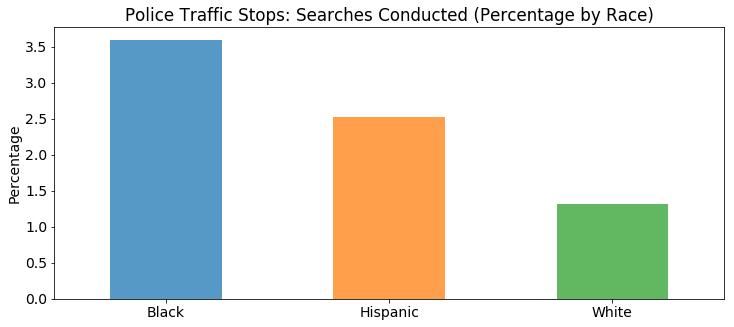

In [18]:
search_percent.plot(kind='bar',alpha=0.75, rot=0)
plt.xlabel('')
plt.ylabel('Percentage')
plt.title('Police Traffic Stops: Searches Conducted (Percentage by Race)')
plt.show()

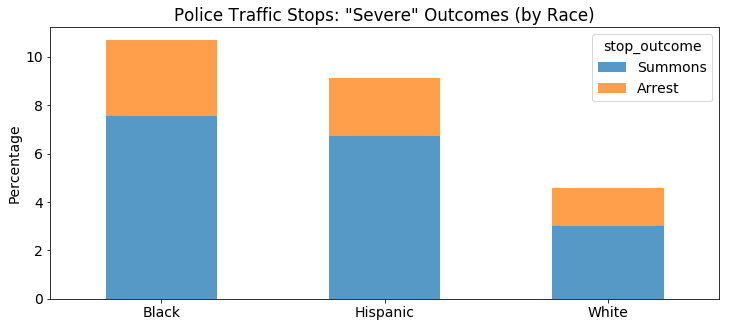

In [139]:
# This is a bit tricky because we're dealing with a multi-index
severe_outcome = stop_outcome[stop_outcome.index.get_level_values('stop_outcome').isin(['Summons', 'Arrest'])]
severe_outcome.unstack().plot(kind='bar', stacked=True, alpha=0.75, rot=0)
plt.xlabel('')
plt.ylabel('Percentage')
plt.title('Police Traffic Stops: "Severe" Outcomes (by Race)')
plt.show()

<img align="left" src="images/SCP_med.png" width="210px">

## Wrap Up
**Panda's Categorical Support is Super Duper!** 

The dataframe memory use went from **1.8MB** to **77KB** which is a **A 25x Memory Decrease!** Not only does this conversion use less memory but dataframe operations will see a **significant performance improvement** since the values are now stored in a more efficient form.

Please visit our follow up notebook where we'll be discussing how to convert categorical features in preparation for machine learning libraries like Scikit-Learn or PyTorch. **It's an exciting and dangerous adventure!**
[Categorical Data, ML, and Dangers!](https://nbviewer.jupyter.org/github/SuperCowPowers/scp-labs/blob/master/notebooks/Categorical_Encoding_Dangers.ipynb).

If you liked this notebook please visit [SCP Labs](https://github.com/SuperCowPowers/scp-labs) for more notebooks and examples, or visit our company page for consulting, development and products [SuperCowPowers](https://www.supercowpowers.com)

### Feedback
We welcome feedback on errors, improvements, or alternative approaches. Please send suggestions to <feedback@supercowpowers.com>

In [1]:
# This cell is simply for adding some CSS (Ignore it :)
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()